### 1. Introdução sobre Análise RFV

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*3n0zfHksE692OgIB8q_esw.jpeg" width="500" height="500" alt="Minha Imagem">

<strong> O que é RFM ? <strong> <br />
    
A análise de RFM é uma técnica de segmentação de clientes com base em três critérios principais: <br />
    
<strong> Recência (R - Recency):</strong> Avalia há quanto tempo um cliente fez sua última compra ou interagiu com a empresa.

<strong>Frequência (F - Frequency): </strong>Analisa com que frequência um cliente faz compras ou interage com a empresa ao longo do tempo.

<strong> Monetaridade (M - Monetary Value): </strong>Mede quanto dinheiro um cliente gastou em suas transações com a empresa. <br/>

Essa análise permite que a empresa segmente seus clientes de acordo com seu comportamento de compra e possibilita o direcionamento de estratégias de marketing específicas para cada grupo, seja para retenção de clientes valiosos, reativação de clientes inativos, análise do ciclo de vida dos clientes, enfim as possibilidades são diversas e com esse tipo de análise as empresas podem personalizar suas estratégias e ações em relação aos seus clientes. <br/>

<strong> Algumas perguntas que vamos responder com base nessa análise </strong>  <br/>
    
- Quais são os melhores clientes ?
- Quais são os clientes com risco de churn (abandono) ?
- Como a recência, frequência e monetaridade mudaram ao longo do tempo ?
    
Viu só que interessante esse assunto? Vamos ver na prática como fazer essa análise? Mas antes vamos detalhar as categorias que serão consideradas para segmentar os clientes.

### Categorização de Clientes <br/>

Recência:
- Recência Alta: clientes que fizeram uma compra nos últimos 30 dias              (1 Mês).
- Recência Média: clientes que fizeram uma compra nos últimos 31 a 90 dias        (2 Meses).
- Recência Baixa: clientes que não fizeram uma compra nos últimos 91 dias ou mais.(3 Meses)

Frequência:
- Frequência Alta: clientes que fizeram 5 ou mais compras nos últimos 90 dias.    (3 Meses)
- Frequência Média: clientes que fizeram entre 2 e 4 compras nos últimos 90 dias. (3 Meses)
- Frequência Baixa: clientes que fizeram menos de 2 compras nos últimos 90 dias.  (3 Meses)

Monetariedade:

- Valor Alto: clientes que gastaram um valor acima da média de compras.
- Valor Médio: clientes que gastaram um valor moderado em relação à média de compras.
- Valor Baixo: clientes que gastaram um valor relativamente baixo em comparação à média de compras.

### 2. Importando Bibliotecas

In [1]:
# bibliotecas para tratamento de dados
import pandas as pd
import numpy as np

# bibliotecas para criação de gráficos

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps

# biblioteca para dados

import calendar
from datetime import datetime

# Settings
sns.set_palette('pastel')
sns.set_theme(style = 'darkgrid')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell

### 3. Carregando o Dataframe <br/>


Link da base: https://github.com/PedroSalviato/Python/tree/main/An%C3%A1lise%20RFM

In [2]:
ecommerce = pd.read_excel('customers.xlsx')
ecommerce.head()

,order_number,order_date,customer_id,quantity,unit_price,freight,discount
0,11979,2021-01-01,C673913546,1,70.9,25.0,0.0
1,11981,2021-01-01,C673919667,1,25.9,15.5,0.0
2,11982,2021-01-01,C673922965,1,159.9,5.0,0.0
3,11988,2021-01-01,C673925163,1,81.9,12.0,0.0
4,11989,2021-01-01,C673927655,1,159.9,5.0,0.0


### 4. Tratamento dos dados

In [3]:
# verificando os tipos de dados, nesse caso não temos valores missing
ecommerce.info()
ecommerce.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38057 entries, 0 to 38056
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_number  38057 non-null  int64         
 1   order_date    38057 non-null  datetime64[ns]
 2   customer_id   38057 non-null  object        
 3   quantity      38057 non-null  int64         
 4   unit_price    38057 non-null  float64       
 5   freight       38057 non-null  float64       
 6   discount      38057 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 2.0+ MB


order_number    0
order_date      0
customer_id     0
quantity        0
unit_price      0
freight         0
discount        0
dtype: int64

In [4]:
# perceba a coluna order_date como object, vamos converter para datetime

ecommerce['order_date'] = pd.to_datetime(ecommerce['order_date'], format = '%d-%m-%Y')
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38057 entries, 0 to 38056
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_number  38057 non-null  int64         
 1   order_date    38057 non-null  datetime64[ns]
 2   customer_id   38057 non-null  object        
 3   quantity      38057 non-null  int64         
 4   unit_price    38057 non-null  float64       
 5   freight       38057 non-null  float64       
 6   discount      38057 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 2.0+ MB


In [5]:
# excluindo os valores zerados ou decimais em unit_price
ecommerce = ecommerce.query('unit_price >= 1')

In [6]:
# agora temos 38.053 linhas agora
ecommerce.shape

(38053, 7)

In [7]:
# Cálculo do valor gasto pelo cliente
# (Quantidade x Valor Unitário ) + Frete do pedido

ecommerce['order_value'] = ecommerce['quantity'] * ecommerce['unit_price']
ecommerce['order_value'] = ecommerce['order_value'] + ecommerce['freight']

ecommerce.head(10)

,order_number,order_date,customer_id,quantity,unit_price,freight,discount,order_value
0,11979,2021-01-01,C673913546,1,70.9,25.00,0.0,95.90
1,11981,2021-01-01,C673919667,1,25.9,15.50,0.0,41.40
2,11982,2021-01-01,C673922965,1,159.9,5.00,0.0,164.90
3,11988,2021-01-01,C673925163,1,81.9,12.00,0.0,93.90
4,11989,2021-01-01,C673927655,1,159.9,5.00,0.0,164.90
5,11990,2021-01-01,C673928377,2,57.9,4.68,0.0,120.48
6,11991,2021-01-01,C541437430,1,67.9,12.76,0.0,80.66
7,11991,2021-01-01,C541437430,1,52.9,9.94,0.0,62.84
8,11991,2021-01-01,C541437430,1,38.9,7.30,0.0,46.20
9,11992,2021-01-01,C673930634,1,64.9,5.00,0.0,69.90


### 5. Recência

In [8]:
# criando dataframe de recência dos clientes

df_recency = ecommerce[['order_date','customer_id']].groupby('customer_id')['order_date'].agg('max').reset_index()
df_recency.head()

,customer_id,order_date
0,C537953795,2021-12-10
1,C537953859,2022-05-10
2,C537954768,2022-02-22
3,C537954812,2021-07-19
4,C537954872,2022-03-11


In [9]:
# Criando uma coluna com a data máxima da tabela 

df_recency['max_date'] = df_recency['order_date'].max()
df_recency.head()

,customer_id,order_date,max_date
0,C537953795,2021-12-10,2022-12-31
1,C537953859,2022-05-10,2022-12-31
2,C537954768,2022-02-22,2022-12-31
3,C537954812,2021-07-19,2022-12-31
4,C537954872,2022-03-11,2022-12-31


In [10]:
# Criando a colunas de dias  ( diferença entre a data maxima da tabela e a ultima compra de cada cliente )

df_recency['days'] = (df_recency['max_date'] - df_recency['order_date']).dt.days
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25806 entries, 0 to 25805
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  25806 non-null  object        
 1   order_date   25806 non-null  datetime64[ns]
 2   max_date     25806 non-null  datetime64[ns]
 3   days         25806 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 806.6+ KB


In [11]:
# Renomear os dias para recency

df_recency = df_recency.rename(
columns = {
            'days': 'recency'
})

df_recency.head().sort_values('recency',ascending = False)

,customer_id,order_date,max_date,recency
3,C537954812,2021-07-19,2022-12-31,530
0,C537953795,2021-12-10,2022-12-31,386
2,C537954768,2022-02-22,2022-12-31,312
4,C537954872,2022-03-11,2022-12-31,295
1,C537953859,2022-05-10,2022-12-31,235


In [12]:
ecommerce.sort_values('order_number', ascending = True).head(10)

,order_number,order_date,customer_id,quantity,unit_price,freight,discount,order_value
0,11979,2021-01-01,C673913546,1,70.9,25.00,0.0,95.90
1,11981,2021-01-01,C673919667,1,25.9,15.50,0.0,41.40
2,11982,2021-01-01,C673922965,1,159.9,5.00,0.0,164.90
3,11988,2021-01-01,C673925163,1,81.9,12.00,0.0,93.90
4,11989,2021-01-01,C673927655,1,159.9,5.00,0.0,164.90
5,11990,2021-01-01,C673928377,2,57.9,4.68,0.0,120.48
7,11991,2021-01-01,C541437430,1,52.9,9.94,0.0,62.84
8,11991,2021-01-01,C541437430,1,38.9,7.30,0.0,46.20
6,11991,2021-01-01,C541437430,1,67.9,12.76,0.0,80.66
9,11992,2021-01-01,C673930634,1,64.9,5.00,0.0,69.90


 ### 6. Frequência e Valor Monetário


Detalhe: no dataset não temos o identificador do produto que foi comprado, isso dificulta um pouco, pois se um cliente compra 2 produtos diferentes, na tabela irá se repetir 2 linhas com o mesmo order_number e quantity = 1, porém se for o mesmo produto a quantity será igual 2. 

-> Veja os exemplos abaixo.

In [13]:
# Cliente comprou 3 produtos diferentes em um pedido.

ecommerce.query('order_number == 11991')

,order_number,order_date,customer_id,quantity,unit_price,freight,discount,order_value
6,11991,2021-01-01,C541437430,1,67.9,12.76,0.0,80.66
7,11991,2021-01-01,C541437430,1,52.9,9.94,0.0,62.84
8,11991,2021-01-01,C541437430,1,38.9,7.30,0.0,46.20


In [14]:
# Cliente comprou 2 unidades de um mesmo produto

ecommerce.query('order_number == 11990')

,order_number,order_date,customer_id,quantity,unit_price,freight,discount,order_value
5,11990,2021-01-01,C673928377,2,57.9,4.68,0.0,120.48


<strong> Por isso é importante conhecermos a base de dados se não faríamos o tratamento errado ! <strong>

Assim para criar o dataframe de frequência e valor, agrupamos customer_id pelo a contagem de valores únicos de order_number (frequência) com o 'nunique' e a média de order_value (valor)

Vamos ver na prática!

In [15]:
# Criando dataframe frequencia e valor

df_fv = ecommerce.groupby('customer_id')[['order_number', 'order_value']].agg({
    'order_number': 'nunique', 
    'order_value': 'mean'
}).reset_index()

In [16]:
# output é o novo dataframe
df_fv.head()

,customer_id,order_number,order_value
0,C537953795,2,56.152500
1,C537953859,12,66.597059
2,C537954768,4,73.050000
3,C537954812,2,111.945000
4,C537954872,2,167.003333


In [17]:
# vamos renomear as colunas devidamente

df_fv = df_fv.rename(
    columns = {
        'order_number': 'frequency',
        'order_value': 'monetary_value'
    }
)


# arrenda os valores

df_fv.monetary_value = df_fv.monetary_value.round(2)

# dataframe final
df_fv.head()

,customer_id,frequency,monetary_value
0,C537953795,2,56.15
1,C537953859,12,66.60
2,C537954768,4,73.05
3,C537954812,2,111.94
4,C537954872,2,167.00


In [18]:
# criando dataframe rfv 

rfv = df_recency.merge(df_fv, on = 'customer_id', how = 'left')

# excluir as colunas order_date e max_date pois não serão mais utilizadas

rfv = rfv.drop('order_date', axis =1)
rfv = rfv.drop('max_date', axis =1)

In [19]:
# dataframe final

rfv.head()

,customer_id,recency,frequency,monetary_value
0,C537953795,386,2,56.15
1,C537953859,235,12,66.60
2,C537954768,312,4,73.05
3,C537954812,530,2,111.94
4,C537954872,295,2,167.00


### 7. Algoritmos K-Means <br /> 

Feito todas as etapas de tratamento do dados, temos o dataframe de clientes com as informações de recência, frequência e valor. <br/>

<strong>Mas como iremos prosseguir para segmentar esses clientes de acordo com informações em grupos de comportamento e caractéristicas semelhantes? Assim entramos no assunto dos algoritmos K-Means<strong> 


Os K-Means são algoritmos usados para agrupar dados com base em suas características, tendências e padrões. O objetivo é encontrar grupos naturais e semelhantes que estão distrúbuidos na estrutura do dados. É uma técnica poderosa para segmentar dados e se encaixa perfeitamente para o que precisamos na análise de RFV.
    
Irei deixar alguns links que eu usei para me introduzir no assunto de K-means que me ajudou muito e espero que seja utíl na sua compreensão também.
Base teórica K-Means: https://youtu.be/q05qbU8FYKU?si=TXEM26Zp19WyIMZd <br />
Técnica de Clustering K-Means: https://estatsite.com.br/2016/05/03/tecnicas-de-clustering-k-means/ <br/>
Exemplo Visual K-Means: https://youtu.be/piDlrtfz58s?si=YYQ5PU4F31A3Sku1

In [20]:
# Importar bibliotecas de machine learning

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# definir as features 

features_cols = ['recency', 'frequency', 'monetary_value']

# gerar uma amostra e uma cópia dessa amostra

amostra = rfv.sample(n=750, random_state =0)
amostra_x = amostra.copy()

In [21]:
# Inicia a Escalonização
scaler = StandardScaler()

In [22]:
# aplica a transfomação e aloca as features no datraframa copiado
scaler.fit(amostra[features_cols])

features_x = scaler.transform(amostra[features_cols])
amostra_x[features_cols] = features_x

In [23]:
amostra_x.head()

,customer_id,recency,frequency,monetary_value
7638,C712134032,0.736758,-0.259827,1.534262
19145,C736534163,-0.816202,1.449563,0.720327
7574,C711694244,0.751786,-0.259827,1.430133
1500,C679266360,1.798782,-0.259827,0.030824
24376,C740533553,-1.502510,-0.259827,-0.566008


Tendo a amostra com a escalas ajustadas agora precisamos definir o número de clusters (grupos), ou seja o K ideal para a análise <br/>

<strong> Podemos utilizar o método de cotovelo (Elbow Method) para encontrarmos o K Ideal <strong>

In [24]:
# Percorrendo os diferentes valores de K

# criamos uma lista para guardar os valores de k e as inercias
valores_k = []
inercias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i , random_state = 0).fit(amostra_x[features_cols])
    valores_k.append(i)
    inercias.append(kmeans.inertia_)

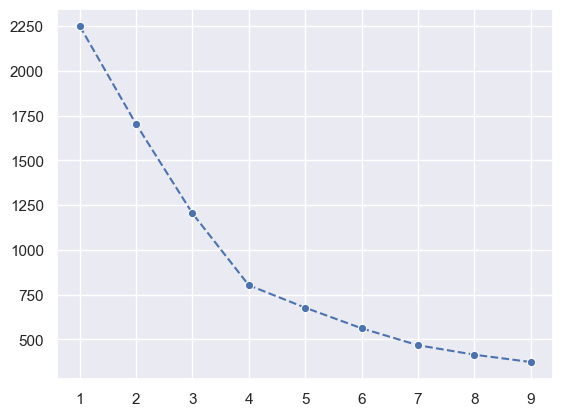

In [37]:
# criando gráfico para o K ideal

sns.lineplot(x = valores_k, y = inercias, palette = 'pastel', linestyle = '--', marker = 'o');

In [26]:
# definir o número de clusters

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(amostra_x[features_cols])

KMeans(n_clusters=4, random_state=0)

In [27]:
# os clusters definidos

kmeans.labels_

array([3, 3, 3, 0, 1, 0, 1, 0, 3, 0, 0, 1, 1, 0, 3, 3, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 1, 3, 0, 3, 0, 1, 1, 0, 1, 0, 3,
       0, 1, 0, 0, 1, 3, 3, 3, 1, 0, 1, 3, 3, 0, 1, 0, 3, 0, 0, 3, 1, 1,
       0, 3, 3, 0, 0, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0,
       1, 0, 1, 1, 1, 3, 1, 3, 1, 3, 0, 1, 3, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 3, 1, 1, 3, 3, 0, 3, 0, 2, 1, 0, 0, 1, 1, 0, 3, 3, 1, 1,
       1, 1, 2, 0, 3, 0, 1, 1, 0, 1, 1, 3, 0, 3, 3, 0, 1, 1, 3, 0, 0, 0,
       3, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 3, 3, 0, 0, 1, 0, 1, 3, 1, 3, 1,
       1, 1, 0, 3, 3, 1, 0, 1, 1, 1, 0, 1, 0, 3, 0, 0, 0, 0, 2, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0, 3, 3, 1, 1, 1, 1,
       3, 1, 3, 0, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 1, 3, 1, 0, 1, 1, 3, 0,
       1, 3, 1, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 0, 3, 1, 0,
       3, 1, 0, 0, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1,

In [28]:
# atribuir os clusters aos clientes

amostra['cluster'] = kmeans.labels_

In [29]:
amostra.head()

,customer_id,recency,frequency,monetary_value,cluster
7638,C712134032,483,1,179.38,3
19145,C736534163,173,2,138.89,3
7574,C711694244,486,1,174.20,3
1500,C679266360,695,1,104.59,0
24376,C740533553,36,1,74.90,1


In [30]:
# clientes em cada cluster

amostra['cluster'].value_counts().sort_index()

cluster
0    266
1    307
2     19
3    158
Name: count, dtype: int64

### 8. Análise Gráfica

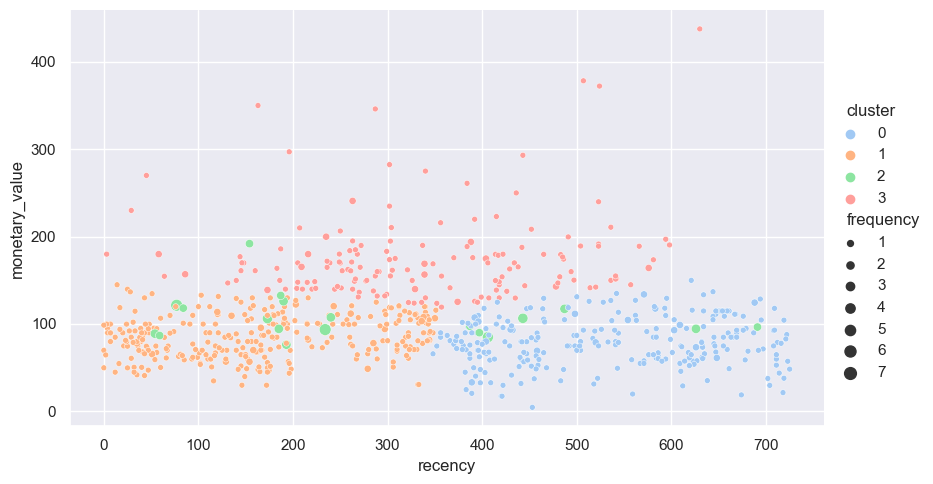

In [31]:
ax = sns.relplot(x = 'recency',
                 y = 'monetary_value',
                 data = amostra,
                 height = 5,
                 aspect = 1.7,
                 hue  = 'cluster',
                 size = 'frequency',
                 palette = 'pastel')

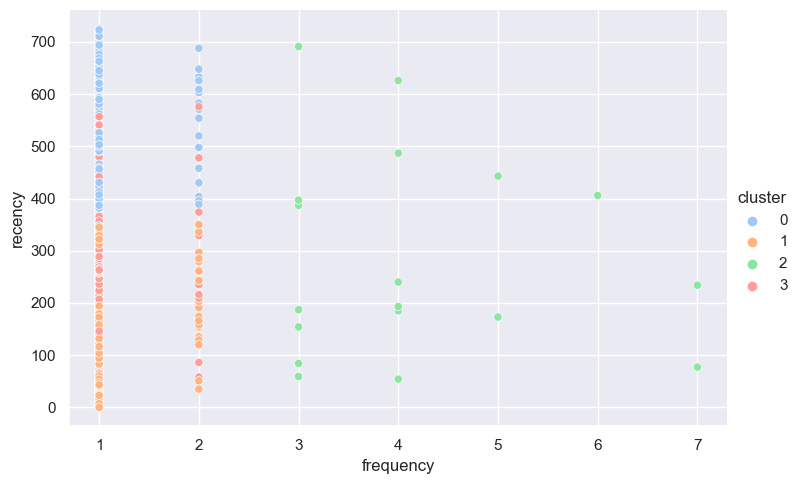

In [32]:
_ = sns.relplot(x = 'frequency',
                y = 'recency',
                data = amostra,
                height = 5,
                aspect = 1.5,
                hue = 'cluster',
                palette = 'pastel')

###  <strong> Vamos investigar o comportamento dos clusters através de boxplots <strong>

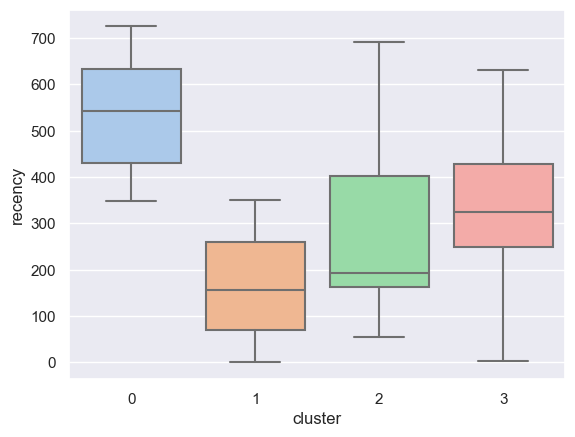

In [33]:
_ = sns.boxplot(data = amostra, x= 'cluster', y = 'recency', palette = 'pastel')

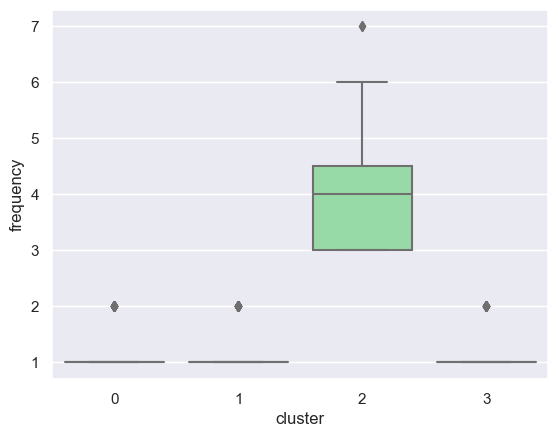

In [34]:
_ = sns.boxplot(data = amostra, x= 'cluster', y = 'frequency', palette = 'pastel')

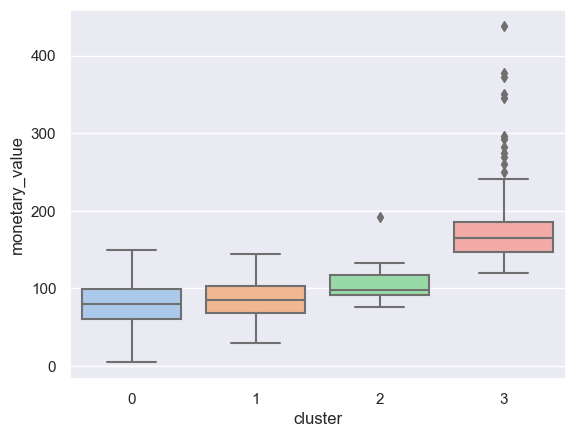

In [35]:
_ = sns.boxplot(data = amostra, x= 'cluster', y = 'monetary_value', palette = 'pastel')

Com os gráficos demonstrados percebemos que os clusters estão separados de acordo com cada comportamento e característica de um grupo de clientes, sendo as segmentações:

- Cluster 0 -> Clientes que compraram a muito tempo e não compraram mais.
- Cluster 1 -> Clientes que compraram recentemente na loja ou até mesmo novos clientes
- Cluster 2 -> Clientes que compram com maior frequência na loja.
- Cluster 3 -> Clientes que em média gastam um valor monétario maior em suas compras.

In [61]:
seg_clientes = amostra.groupby('cluster')[['recency', 'frequency', 'monetary_value']].agg({'recency': 'mean',
                                                                           'frequency': 'mean',
                                                                           'monetary_value': 'mean'
                                                                          }).reset_index()

In [65]:
seg_clientes.sort_index()

,cluster,recency,frequency,monetary_value
0,0,537.582707,1.067669,80.055526
1,1,164.830619,1.068404,85.303583
2,2,277.210526,4.157895,106.906842
3,3,335.949367,1.094937,175.811899


In [66]:
# Vamos nomear esses clientes de acordo com seus comportamentos

seg_map = ['churn', 'oportunidades', 'cliente frequentes', 'ouro']

In [68]:
seg_clientes['agrupamento'] = seg_map
seg_clientes

,cluster,recency,frequency,monetary_value,agrupamento
0,0,537.582707,1.067669,80.055526,churn
1,1,164.830619,1.068404,85.303583,oportunidades
2,2,277.210526,4.157895,106.906842,cliente frequentes
3,3,335.949367,1.094937,175.811899,ouro
